In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data= pd.read_excel('./Inputdata.xlsx')

In [3]:
data.head()
print(data.shape)

(3216, 27)


In [4]:
data.isnull().sum()

timeframe                2
uuid                     1
cpu                   1135
memfree               1128
totalConf             1127
version               1128
AVCParty              1128
PartyJoined           1129
ContentStarted        1128
SVCParty              1127
ContentRejected       1127
totalCrash            3182
VMSize (ConfParty)     448
confEncrypted         1128
H323Party             1127
SIPParty              1127
MfagetstackBT         3208
pstack-mfa            3196
CDR                   3215
Resource              3215
CertMngr              3213
SystemMonitorin       3215
Vreader               3215
McmsDaemon            3215
backtrace             3215
MCCFMngr              3215
Logger                3215
dtype: int64

In [5]:
data.drop(['VMSize (ConfParty)','timeframe','uuid'],axis=1,inplace=True)

In [6]:
data.columns

Index(['cpu', 'memfree', 'totalConf', 'version', 'AVCParty', 'PartyJoined',
       'ContentStarted', 'SVCParty', 'ContentRejected', 'totalCrash',
       'confEncrypted', 'H323Party', 'SIPParty', 'MfagetstackBT', 'pstack-mfa',
       'CDR', 'Resource', 'CertMngr', 'SystemMonitorin', 'Vreader',
       'McmsDaemon', 'backtrace', 'MCCFMngr', 'Logger'],
      dtype='object')

In [7]:
data.dropna(subset = ['version'],inplace=True)

In [8]:
data['cpu'].fillna(value=data['cpu'].mean(),inplace=True)

In [9]:
data.fillna(value=0,inplace=True)

In [10]:
data.isnull().sum()

cpu                0
memfree            0
totalConf          0
version            0
AVCParty           0
PartyJoined        0
ContentStarted     0
SVCParty           0
ContentRejected    0
totalCrash         0
confEncrypted      0
H323Party          0
SIPParty           0
MfagetstackBT      0
pstack-mfa         0
CDR                0
Resource           0
CertMngr           0
SystemMonitorin    0
Vreader            0
McmsDaemon         0
backtrace          0
MCCFMngr           0
Logger             0
dtype: int64

In [11]:
data.dtypes

cpu                float64
memfree            float64
totalConf          float64
version             object
AVCParty           float64
PartyJoined        float64
ContentStarted     float64
SVCParty           float64
ContentRejected    float64
totalCrash         float64
confEncrypted      float64
H323Party          float64
SIPParty           float64
MfagetstackBT      float64
pstack-mfa         float64
CDR                float64
Resource           float64
CertMngr           float64
SystemMonitorin    float64
Vreader            float64
McmsDaemon         float64
backtrace          float64
MCCFMngr           float64
Logger             float64
dtype: object

In [76]:
data.head()

,cpu,memfree,totalConf,version,AVCParty,PartyJoined,ContentStarted,SVCParty,ContentRejected,totalCrash,...,pstack-mfa,CDR,Resource,CertMngr,SystemMonitorin,Vreader,McmsDaemon,backtrace,MCCFMngr,Logger
0,96.17,3871504.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98.52,228476.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.22,145948.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98.13,3281932.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,96.28,5484400.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


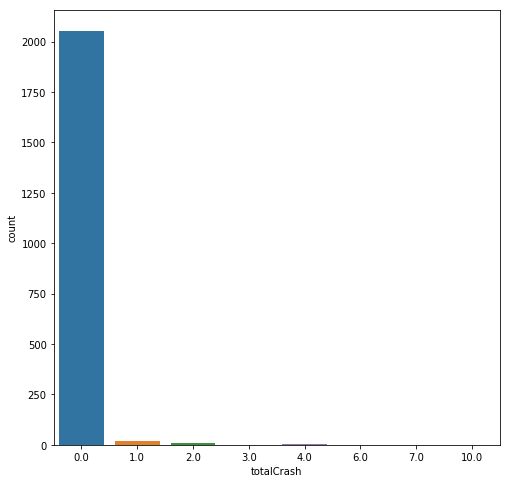

In [75]:
plt.figure(figsize=(8,8))
sns.countplot(x='totalCrash',data=data)

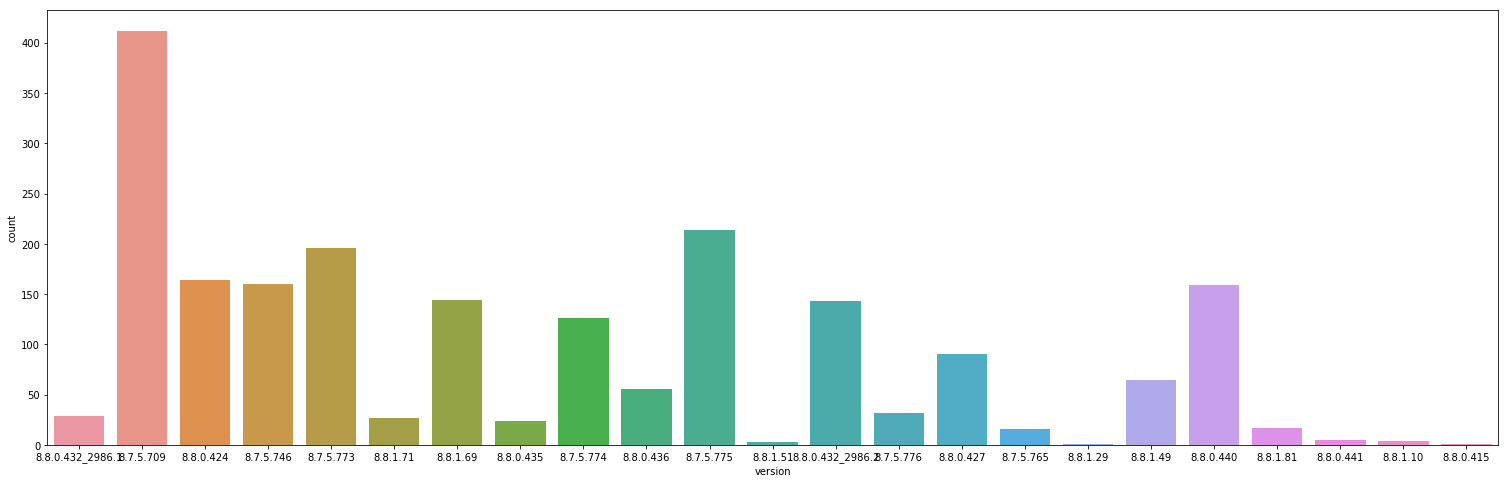

In [13]:
plt.figure(figsize=(26,8))
sns.countplot(x='version',data=data)

In [21]:
print(data.version.unique())
versionno=data.version.unique()
print(versionno[0])

['8.8.0.432_2986.1' '8.7.5.709' '8.8.0.424' '8.7.5.746' '8.7.5.773'
 '8.8.1.71' '8.8.1.69' '8.8.0.435' '8.7.5.774' '8.8.0.436' '8.7.5.775'
 '8.8.1.51' '8.8.0.432_2986.2' '8.7.5.776' '8.8.0.427' '8.7.5.765'
 '8.8.1.29' '8.8.1.49' '8.8.0.440' '8.8.1.81' '8.8.0.441' '8.8.1.10'
 '8.8.0.415']
8.8.0.432_2986.1


In [28]:
for i in range (len(versionno)):
    data['version'][data['version']==versionno[i]]=i
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
data.version.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22], dtype=object)

In [15]:
data.version.nunique()

23

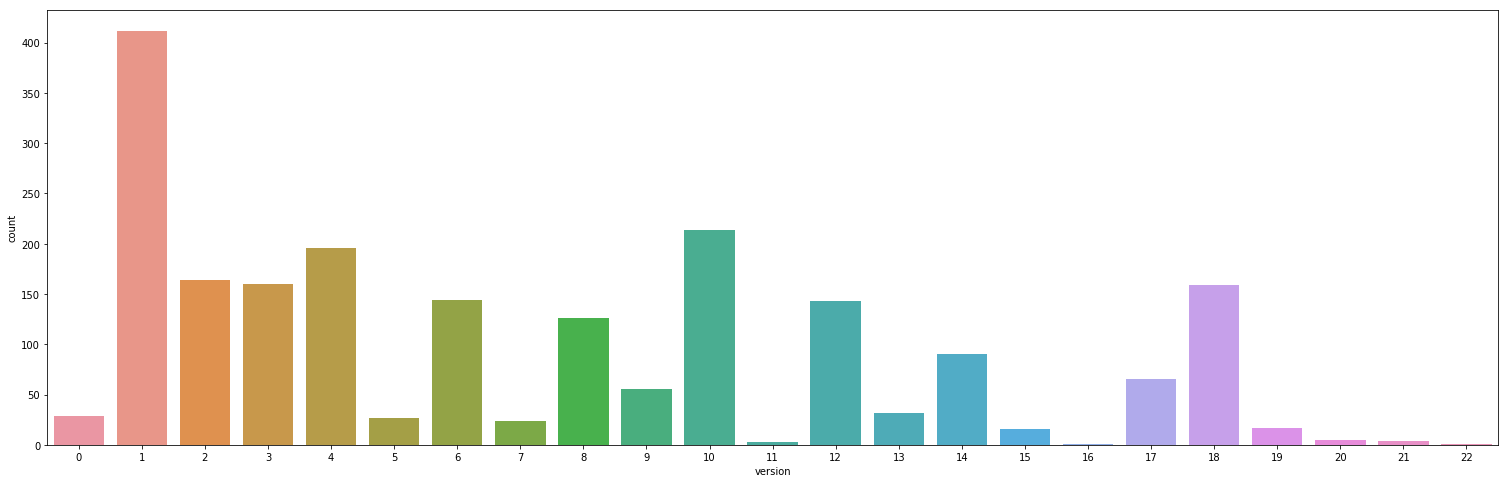

In [30]:
plt.figure(figsize=(26,8))
sns.countplot(x='version',data=data)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


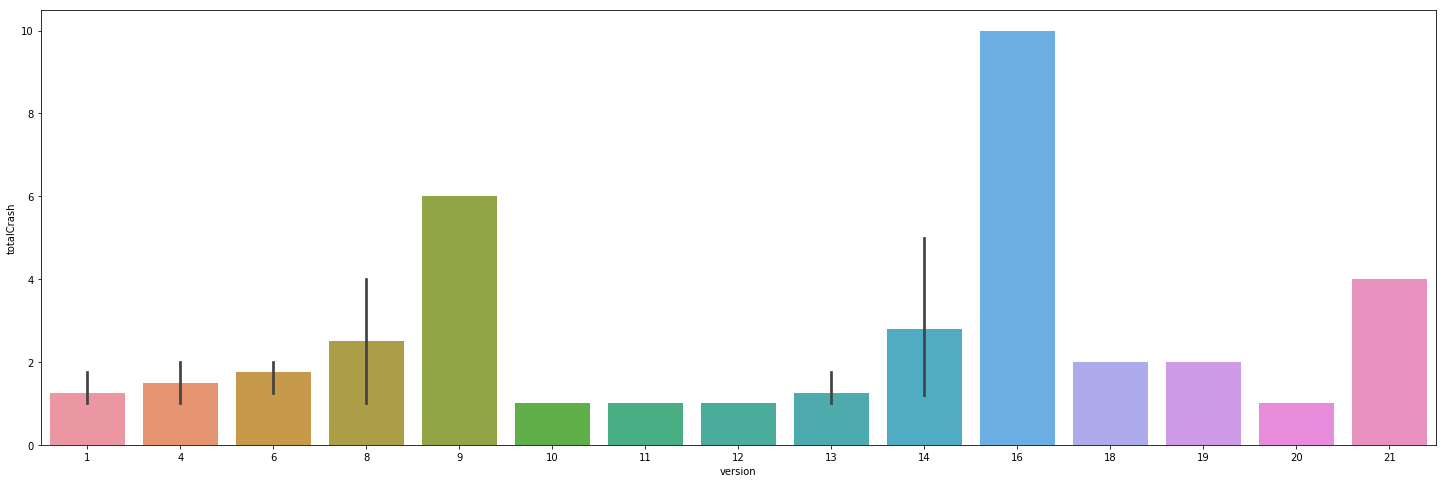

In [32]:
plt.figure(figsize=(25,8))
sns.barplot(x='version',y='totalCrash',data=data[data['totalCrash']>0])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


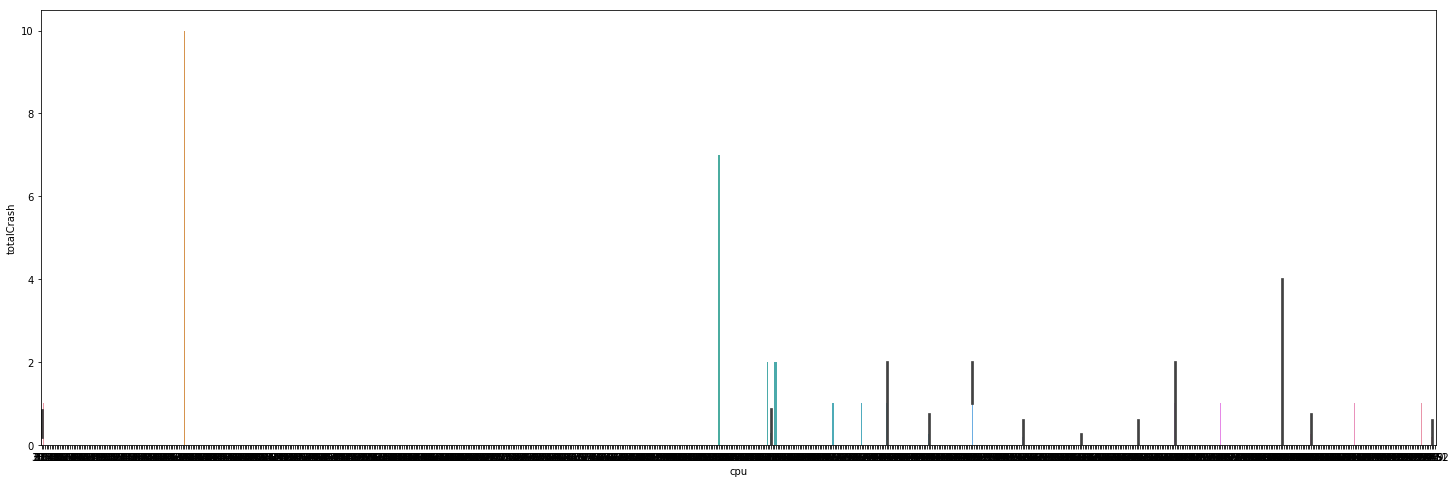

In [45]:
plt.figure(figsize=(25,8))
sns.barplot(x='cpu',y='totalCrash',data=data)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value enc

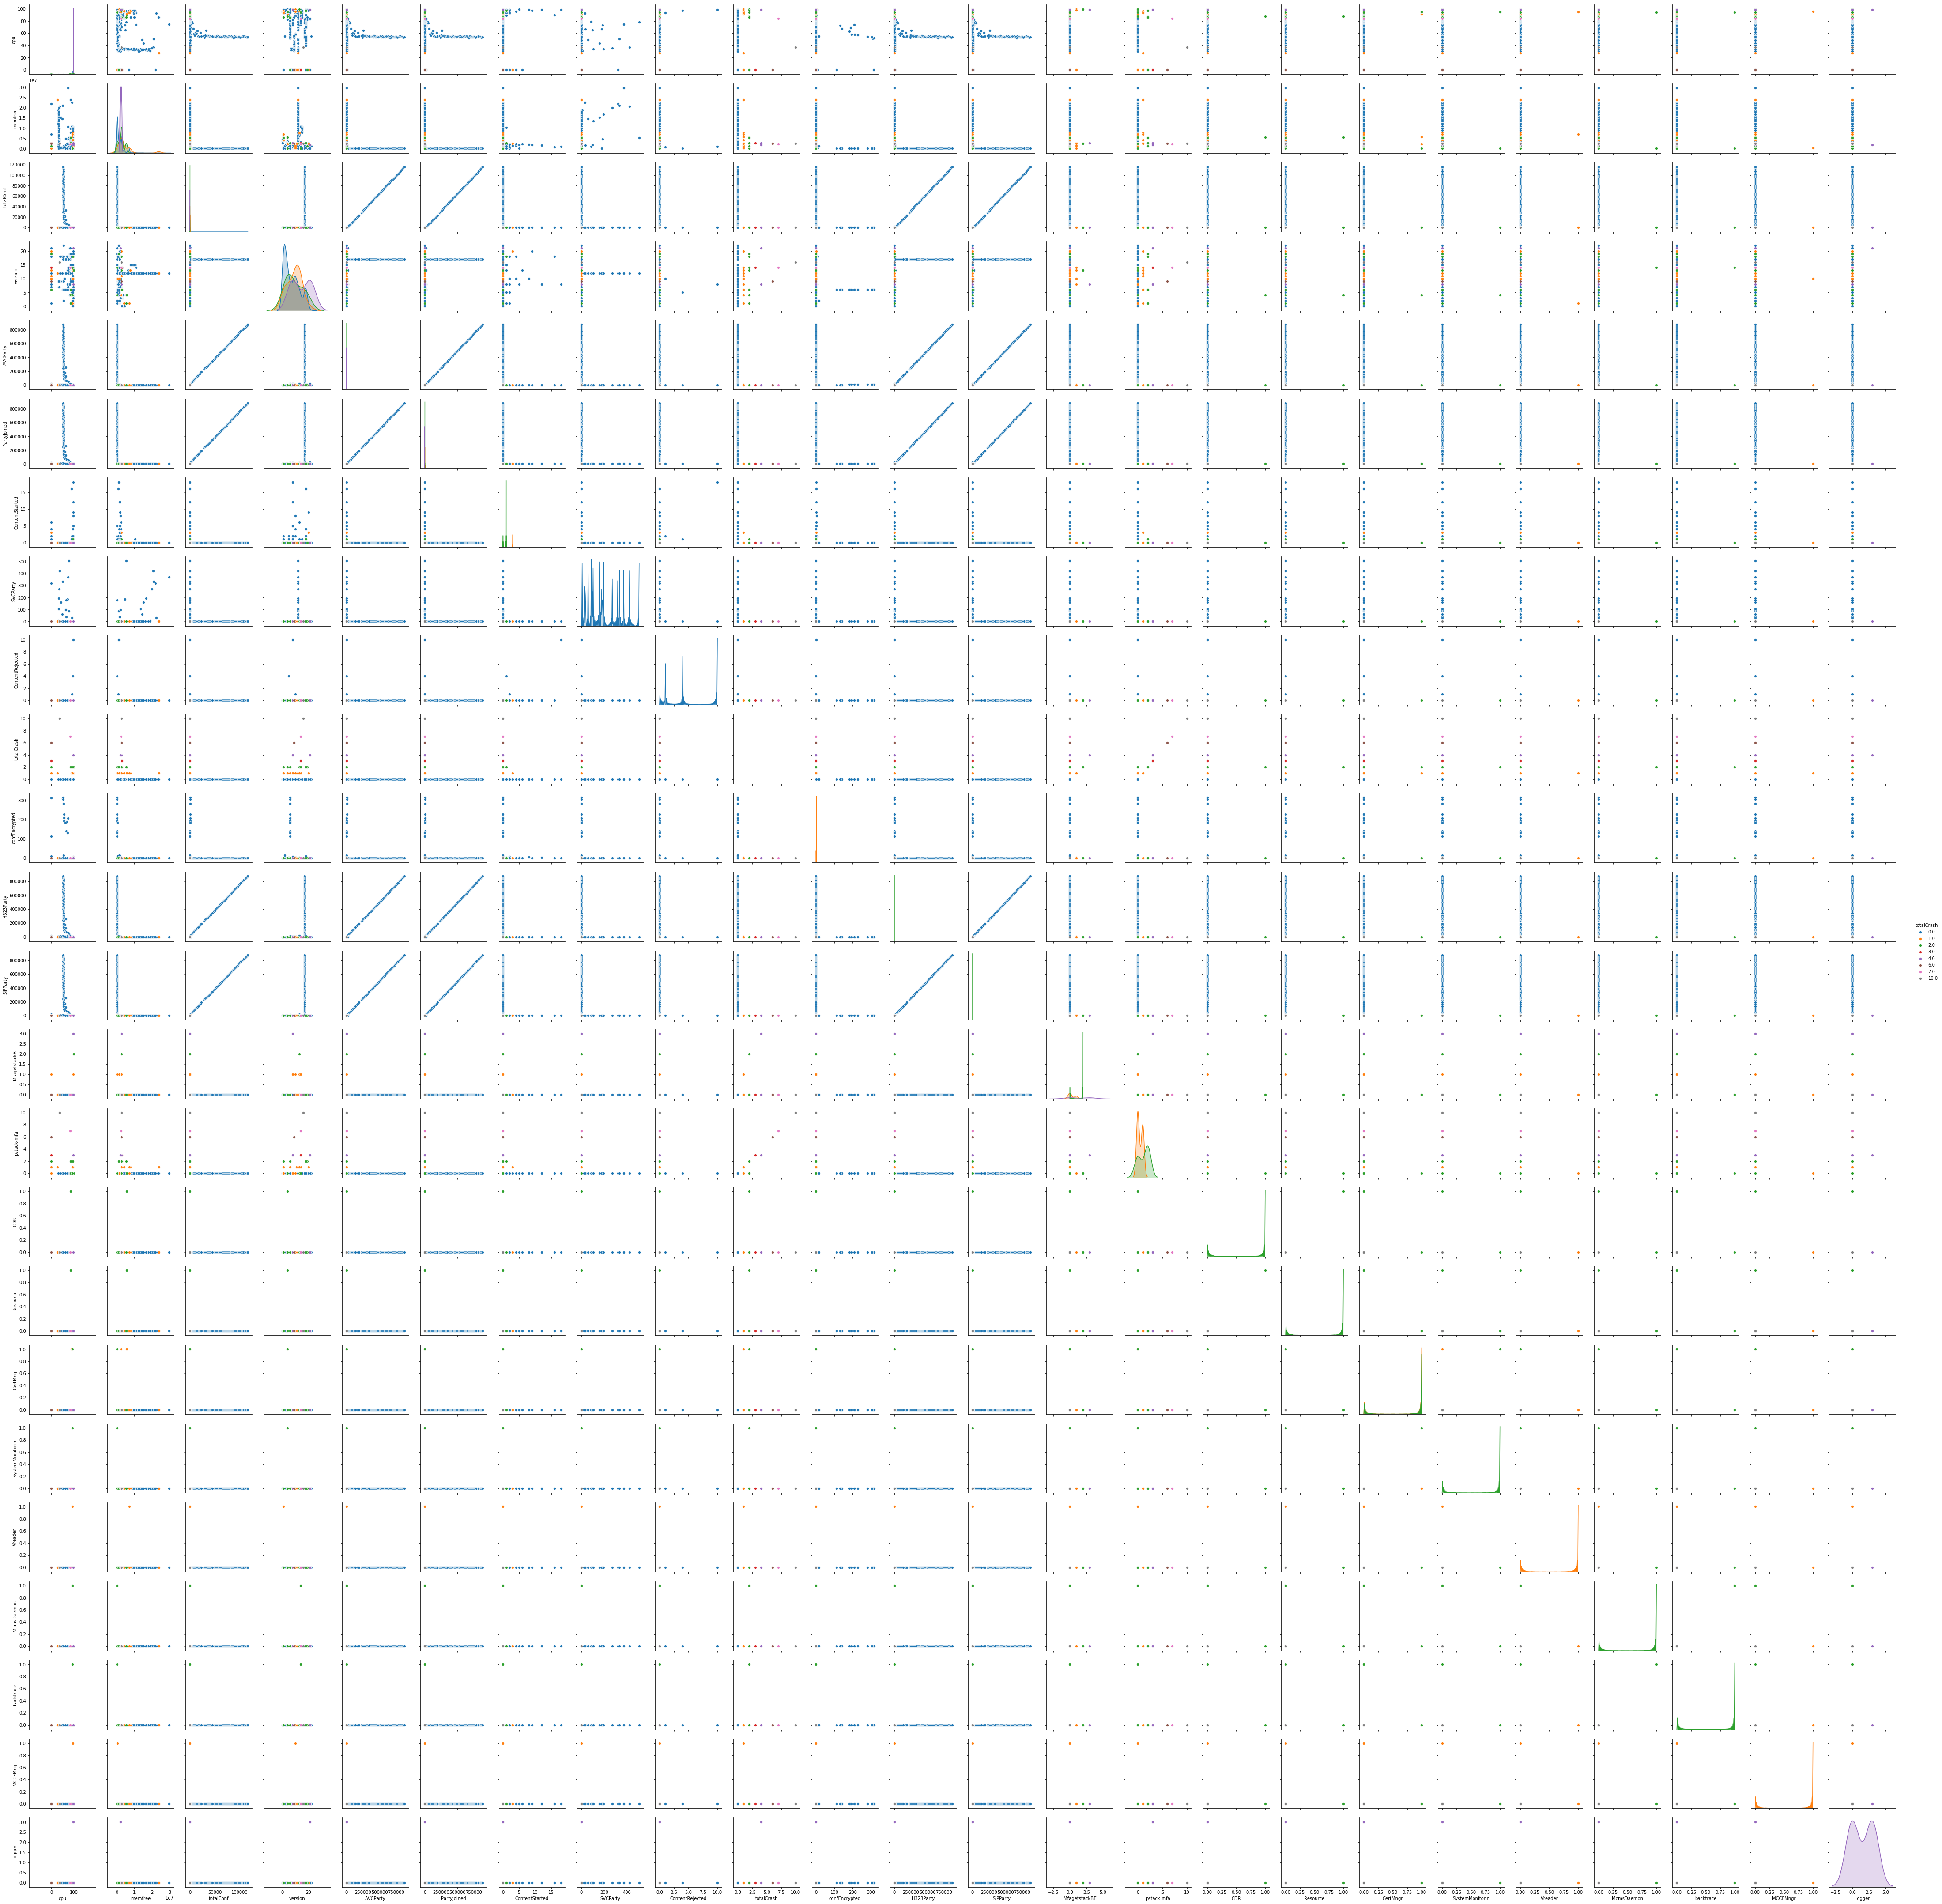

In [77]:
sns.pairplot(data=data,hue='totalCrash')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1872x576 with 0 Axes>

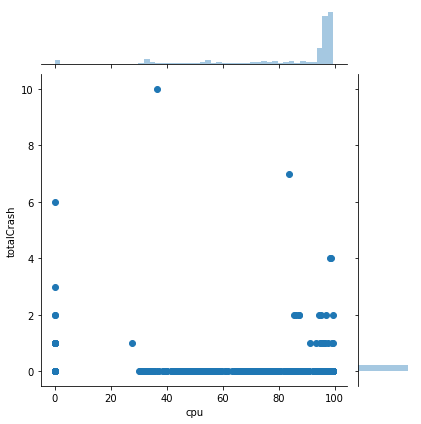

In [46]:
plt.figure(figsize=(26,8))
sns.jointplot(x='cpu',y='totalCrash',data=data)

In [86]:
data[data['totalCrash']>0].groupby('version').totalCrash.value_counts()
#Input_data[Input_data['totalCrash'] > 0].groupby('version').totalCrash.value_counts(sort=True)

version  totalCrash
1        1.0           3
         2.0           1
4        1.0           2
         2.0           2
6        2.0           3
         1.0           1
8        1.0           1
         4.0           1
9        6.0           1
10       1.0           3
11       1.0           1
12       1.0           1
13       1.0           3
         2.0           1
14       1.0           2
         2.0           1
         3.0           1
         7.0           1
16       10.0          1
18       2.0           1
19       2.0           1
20       1.0           1
21       4.0           1
Name: totalCrash, dtype: int64

In [33]:
X=data.drop(['totalCrash'],axis=1)
y=data['totalCrash']
print(X.shape)
print(y.shape)

(2088, 23)
(2088,)


In [34]:
X=(X-X.mean())/(X.max()-X.min())

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       677
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1

   micro avg       0.98      0.98      0.98       690
   macro avg       0.25      0.25      0.25       690
weighted avg       0.96      0.98      0.97       690



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       677
     Class 1       0.00      0.00      0.00         9
     Class 2       0.00      0.00      0.00         3
     Class 3       0.00      0.00      0.00         1

   micro avg       0.98      0.98      0.98       690
   macro avg       0.25      0.25      0.25       690
weighted avg       0.96      0.98      0.97       690



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
